### Step1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Step2. Creating & Reading the data

In [2]:
df= pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Supervised_ML\DecisionTree_RandomForest_EnsembleTechniques\admission.csv",index_col=0)
df.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
247,316,105,3,3.0,3.5,8.73,0,0.72
393,326,112,4,4.0,3.5,9.12,1,0.84
86,319,103,4,4.5,3.5,8.66,0,0.76
299,330,114,3,4.5,4.5,9.24,1,0.90
217,322,112,4,4.5,4.5,9.26,1,0.91
68,316,107,2,3.5,3.5,8.64,1,0.57
284,321,111,3,2.5,3.0,8.90,1,0.80
267,312,105,2,2.0,2.5,8.45,0,0.72
331,327,113,3,3.5,3.0,8.66,1,0.80


In [3]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.columns=["GRE_Score","TOEFL_Score","University_Rating","SOP","LOR","CGPA","Research","Chance_of_Admit"]

### Step3. Data Exploration

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
df.shape

(500, 8)

### Step4. Check if there are missing values. If yes, handle them.

In [7]:
df.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

<AxesSubplot:>

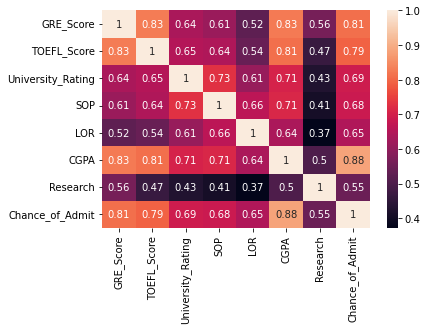

In [9]:
corr_df=df.corr()
sns.heatmap(corr_df,annot=True)

#correlogram

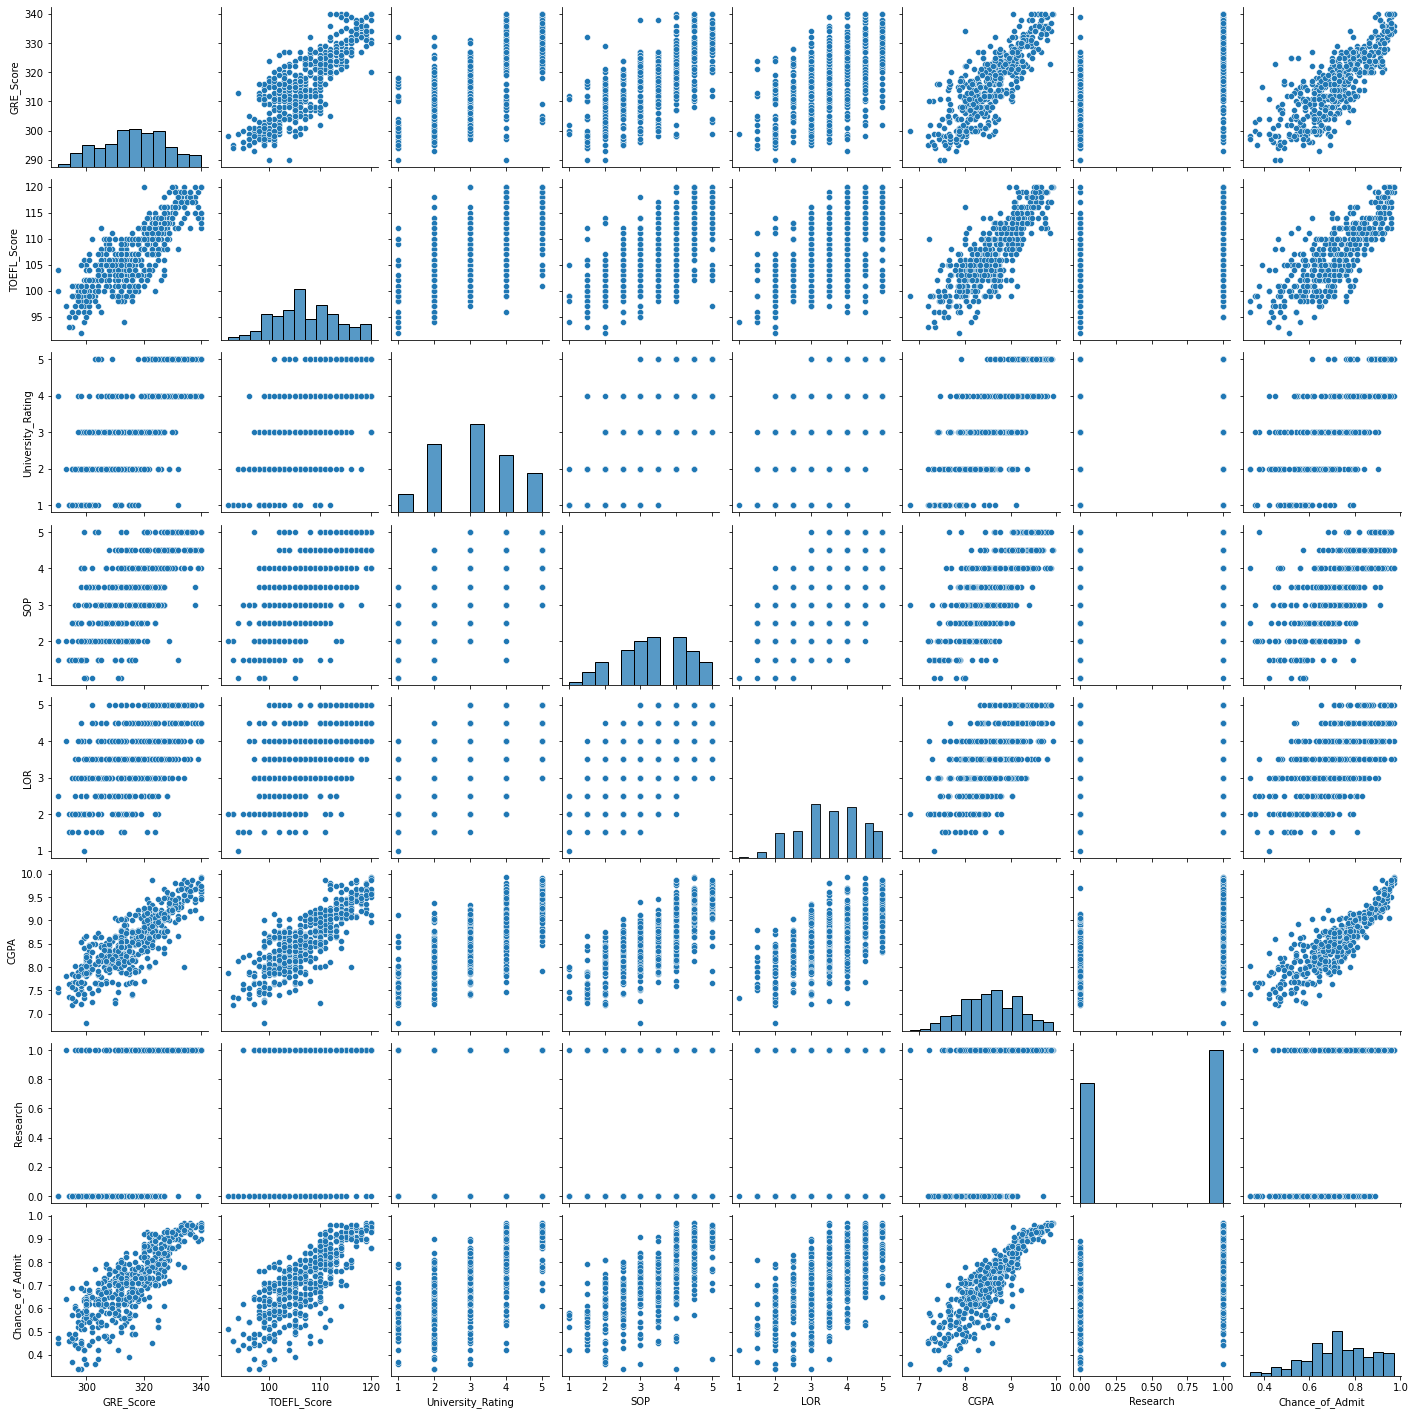

In [10]:
sns.pairplot(df)

In [11]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
value_counts=df["University_Rating"].value_counts()
value_counts

3    162
2    126
4    105
5     73
1     34
Name: University_Rating, dtype: int64

In [13]:
for i in df.University_Rating.value_counts():
    print(i/len(df.University_Rating)*100)

32.4
25.2
21.0
14.6
6.800000000000001


#Convert the target variable “Chance of Admit” to categorical having values 0 and 1

In [14]:
for i in df.Chance_of_Admit:
    if i >0.80:
        df.Chance_of_Admit.replace(i,1,inplace=True)
    else:
        df.Chance_of_Admit.replace(i,0,inplace=True)

### Step5. Creating X & Y

In [15]:
X= df.values[:,:-1]
Y= df.values[:,-1].astype(int)

# Scaling the data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

## Step6. Shuffle and Split Data

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=10)

In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(375, 7)
(375,)
(125, 7)
(125,)


# Training the model

In [19]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")

model_DecisionTree.fit(X_train,Y_train)

Y_pred=model_DecisionTree.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1)]

# Evaluation

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[84  5]
 [ 7 29]]
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        89
           1       0.85      0.81      0.83        36

    accuracy                           0.90       125
   macro avg       0.89      0.87      0.88       125
weighted avg       0.90      0.90      0.90       125

Accuracy of the model:  0.904


In [21]:
from sklearn import tree
with open(r"C:\Users\shrey\OneDrive\Desktop\ppppppppp\MicroProjects\Decision_Tree\model_DecisionTree", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=df.columns[0:-1],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [22]:
print(list(zip(df.columns[:-1],model_DecisionTree.feature_importances_)))

[('GRE_Score', 0.040397623266748436), ('TOEFL_Score', 0.050706085899324314), ('University_Rating', 0.0396919130982687), ('SOP', 0.004383811461036685), ('LOR', 0.043042049345054276), ('CGPA', 0.8062917965162738), ('Research', 0.015486720413293879)]


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
tree=DecisionTreeClassifier(random_state=10)       
knn=KNeighborsClassifier(n_neighbors=15,metric="euclidean")   
svm=SVC(kernel="rbf",gamma=0.1,C=1,random_state=10)     
logreg=LogisticRegression(random_state=10)    

In [25]:
models=[tree,knn,svm,logreg]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

for model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print()
    clf_report= classification_report(Y_test,Y_pred)
    print(clf_report)
    accuracy=accuracy_score(Y_test,Y_pred)
    print("Accuracy of the",type(model).__name__, " model is ",accuracy)
    print()

[[84  5]
 [ 7 29]]

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        89
           1       0.85      0.81      0.83        36

    accuracy                           0.90       125
   macro avg       0.89      0.87      0.88       125
weighted avg       0.90      0.90      0.90       125

Accuracy of the DecisionTreeClassifier  model is  0.904

[[88  1]
 [ 4 32]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.97      0.89      0.93        36

    accuracy                           0.96       125
   macro avg       0.96      0.94      0.95       125
weighted avg       0.96      0.96      0.96       125

Accuracy of the KNeighborsClassifier  model is  0.96

[[87  2]
 [ 4 32]]

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.94      0.89      0.91        36

    accurac

In [27]:
X=scaler.inverse_transform(X_test)

In [28]:
test=pd.DataFrame(X)

In [29]:
test.columns=["GRE_Score","TOEFL_Score","University_Rating","SOP","LOR","CGPA","Research"]

In [30]:
test["Actual_Admit"]=Y_test
test["Prediction_of_Admit"]=Y_pred

In [31]:
test["Prediction_of_Admit"]=test["Prediction_of_Admit"].replace({0:"Low",1:"High"})

In [32]:
test.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Actual_Admit,Prediction_of_Admit
0,332.0,116.0,5.0,5.0,5.0,9.28,1.0,1,High
1,325.0,114.0,5.0,4.0,5.0,9.46,1.0,1,High
2,326.0,108.0,3.0,3.0,3.5,8.89,0.0,0,Low
3,324.0,111.0,5.0,4.5,4.0,9.16,1.0,1,High
4,303.0,105.0,5.0,5.0,4.5,8.65,0.0,0,Low


In [33]:
test.to_excel(r"C:\Users\shrey\OneDrive\Desktop\ppppppppp\MicroProjects\Decision_Tree\admission.xlsx",index=False,header=True)

# Ensemble Modelling- Bagging

# Random-Forest-Classifier

In [34]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,
                                          random_state=10,bootstrap=True, n_jobs=-1)
#n_jobs are use to priotize the current work

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)
#print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1)]

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[87  2]
 [ 6 30]]
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.94      0.83      0.88        36

    accuracy                           0.94       125
   macro avg       0.94      0.91      0.92       125
weighted avg       0.94      0.94      0.93       125

Accuracy of the model:  0.936
